In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [92]:
DataSource='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/'
DataFile='master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DataFileD='master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DataFileDUS='master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
DataFileCUS='master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

cva=pd.read_csv('{}{}'.format(DataSource,DataFile))
cva=cva.reset_index(drop=True)
cvaDeath = pd.read_csv('{}{}'.format(DataSource,DataFileD))
cvaDUS = pd.read_csv('{}{}'.format(DataSource,DataFileDUS))
cvaCUS = pd.read_csv('{}{}'.format(DataSource,DataFileCUS))

In [93]:
COVIDperCountry = cva.iloc[:,1:cva.shape[1]]

def exponencial(x,a,b):
    return a*np.exp(b*x)

In [94]:
C = COVIDperCountry.T
C.columns = list(COVIDperCountry['Country/Region'])
C = C.iloc[1:cva.shape[0],:]

In [95]:
cv = cva.T

In [96]:
cv.columns = cva['Country/Region']

In [97]:
cvDate = cv.iloc[4:cva.shape[0],:].reset_index()

In [98]:
cvDate = cvDate.rename(columns={'index':'Fecha'})

In [99]:
Ccoord = C.iloc[0:2,:]
Cconfirmed = C.iloc[2:cva.shape[0],:]

def fitExp(c='Colombia',pl=0):
    dia = 0
    dias = []
    casos = []
    
    if len(cvDate[c].shape) == 1:
    
        for i in range(Cconfirmed.shape[0]):
            dia += 1
            dias.append(dia)
            casos.append(Cconfirmed[c].iloc[i])
            
        if casos[-1] > 1: 

            casos = np.array(casos); dias = np.array(dias)

            ind = np.where(casos>1)

            ind1 = ind[0]
            ind1=np.insert(ind1,0,ind[0][0]-1)
            diasExp = np.array(dias[ind1] - dias[ind1][0])
            casosExp = np.array(casos[ind1])
            
            if len(diasExp) > 2:
                ajuste, cov = curve_fit(exponencial, diasExp, casosExp,p0=[1,0.3])
                latitud = Ccoord[c][0]
            else:
                ajuste=[np.nan, np.nan]; casosExp = [0,1]; latitud=np.nan
                
            if pl !=0:
                fig = plt.figure(figsize = (10,5))
                plt.subplot(121)
                plt.scatter(diasExp, casosExp, label='Datos observados')
                plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
                plt.yscale('log')
                plt.grid(True,which='both')
                plt.legend()
                plt.subplot(122)
                plt.scatter(diasExp, casosExp, label='Datos observados')
                plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)

        #     fig.savefig('Ajuste.png')
            if pl !=0:
                fig = plt.figure(figsize = (5,5))
                plt.scatter(0, casosExp[-1], label = 'Ultimo dato observados')
                d = np.arange(max(diasExp), max(diasExp) + 8, 1)
                plt.scatter(d-max(diasExp), exponencial(d,*ajuste),c='red', label = 'Casos esperados en la siguiente semana')
                for i in range(8):
                    plt.text(d[i]-max(diasExp), exponencial(d,*ajuste)[i],str(exponencial(d,*ajuste)[i]) ,c='black')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)
                fig.savefig('Esperado.png')

        #     print(exponencial(d,*ajuste))
        else:
            ajuste=[np.nan, np.nan]; casosExp = [0,1]; latitud=np.nan
    else:
        for i in range(Cconfirmed.shape[0]):
            dia += 1
            dias.append(dia)
            casos.append(cvDate[c].sum(axis=1).iloc[i])

        casos = np.array(casos); dias = np.array(dias)

        ind = np.where(casos>1)

        ind1 = ind[0]
        ind1=np.insert(ind1,0,ind[0][0]-1)
        diasExp = np.array(dias[ind1] - dias[ind1][0])
        casosExp = np.array(casos[ind1])
        
        if len(diasExp) > 2:
            ajuste, cov = curve_fit(exponencial, diasExp, casosExp,p0=[1,0.3])
            latitud = Ccoord[c].mean(axis=1)[0]
        else:
            ajuste=[np.nan, np.nan]; casosExp = [0,1]; latitud=np.nan
        
        if pl!=0:
            fig = plt.figure(figsize = (10,5))
            plt.subplot(121)
            plt.scatter(diasExp, casosExp, label='Datos observados')
            plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
            plt.yscale('log')
            plt.grid(True,which='both')
            plt.legend()
            plt.title(c)
            plt.subplot(122)
            plt.scatter(diasExp, casosExp, label='Datos observados')
            plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
            plt.grid(True,which='both')
            plt.legend()
            plt.title(c)

    #     fig.savefig('Ajuste.png')
        if pl!=0:
            fig = plt.figure(figsize = (5,5))
            plt.scatter(0, casosExp[-1], label = 'Ultimo dato observados')
            d = np.arange(max(diasExp), max(diasExp) + 8, 1)
            plt.scatter(d-max(diasExp), exponencial(d,*ajuste),c='red', label = 'Casos esperados en la siguiente semana')
            for i in range(8):
                plt.text(d[i]-max(diasExp), exponencial(d,*ajuste)[i],str(exponencial(d,*ajuste)[i]) ,c='black')
            plt.grid(True,which='both')
            plt.legend()
            plt.title(c)
    
    return ajuste, casosExp, abs(latitud)


In [100]:
paises = cva['Country/Region'].unique()
ajustes = []
Casos = []
LAT = []
for i in paises:
    ajuste, casos, Lat = fitExp(i)
    ajustes.append(ajuste)
    Casos.append(casos[-1])
    LAT.append(Lat)

C:\Users\mdomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [101]:
ajustes=np.array(ajustes)

In [102]:
ajustes = pd.DataFrame(ajustes)

In [103]:
ajustes.columns = ['Corte', 'Crecimiento']

In [104]:
ajustes['Paises'] = paises
ajustes['Casos Ultimo dia'] = Casos
ajustes['Distancia del Ecuador'] = LAT

In [105]:
aT = ajustes.T
aT.columns = paises
aT['Colombia']

Corte                      241.826
Crecimiento              0.0662024
Paises                    Colombia
Casos Ultimo dia              5379
Distancia del Ecuador       4.5709
Name: Colombia, dtype: object

In [106]:
ajustes.sort_values('Casos Ultimo dia',ascending=False)

,Corte,Crecimiento,Paises,Casos Ultimo dia,Distancia del Ecuador
156,2777.068781,0.063731,US,965785.0,37.090200
138,6158.737036,0.048577,Spain,226629.0,40.000000
77,6483.698520,0.041512,Italy,197675.0,43.000000
56,1149.868310,0.055026,France,162220.0,8.305673
60,2919.298503,0.046826,Germany,157770.0,51.000000
...,...,...,...,...,...
96,3.227162,0.024676,Mauritania,7.0,21.007900
181,2.600496,0.037045,South Sudan,6.0,6.877000
182,3.704700,0.028209,Western Sahara,6.0,24.215500
183,3.376105,0.011487,Sao Tome and Principe,4.0,0.186360


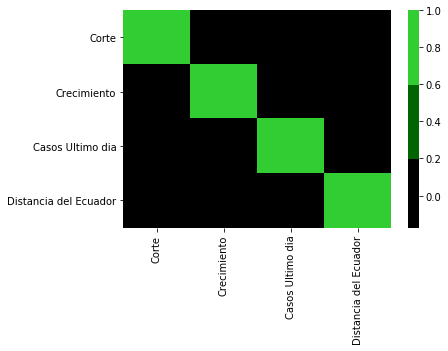

In [107]:
sns.heatmap(ajustes.corr(),cmap = ['red','darkred','black','darkgreen','limegreen'],center=0)

(array([1.54606658e+02, 4.66783224e-02]),
 array([   1,    3,    3,    4,    5,    5,    5,    5,    5,    5,    5,
           6,    8,    8,   12,   20,   28,   39,   52,  102,  102,  155,
         205,  283,  368,  451,  514,  589,  647,  708,  797,  868,  950,
        1039, 1106, 1160, 1210, 1239, 1283, 1312, 1330, 1349, 1366, 1386,
        1401, 1409, 1422, 1431, 1440, 1445, 1451, 1456, 1461, 1470, 1469]),
 40.9006)

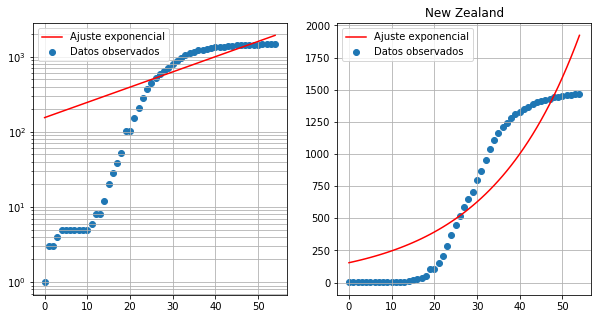

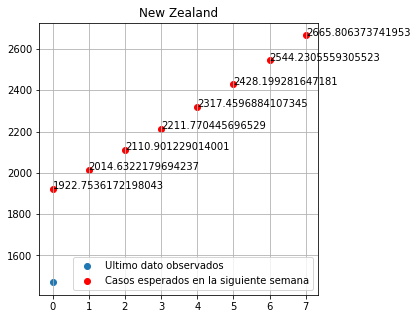

In [109]:
fitExp('New Zealand',pl=1)

In [19]:
COVIDperCountry = cvaDeath.iloc[:,1:cvaDeath.shape[1]]
C = COVIDperCountry.T
C.columns = list(COVIDperCountry['Country/Region'])
C = C.iloc[1:cva.shape[0],:]

In [20]:
C

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe,Yemen
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-3.3731,8.46056,12.1784,-13.2543,-51.7963,46.8852,6.877,24.2155,0.18636,15.5527
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,29.9189,-11.7799,-68.2385,34.3015,-59.5236,-56.3159,31.307,-12.8858,6.61308,48.5164
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/22/20,40,27,402,37,2,3,152,24,3,26,...,1,0,0,3,0,0,0,0,0,0
4/23/20,42,27,407,37,2,3,165,24,3,31,...,1,1,0,3,0,0,0,0,0,0
4/24/20,43,27,415,40,2,3,176,27,3,33,...,1,2,0,3,0,0,0,0,0,0
4/25/20,47,27,419,40,2,3,185,28,3,33,...,1,2,0,3,0,0,0,0,0,0


In [21]:
# a = cvaDUS.T
# a.columns = cvaDUS['Province_State']

COVIDperAdmin = cvaDUS.iloc[:,6:cvaDUS.shape[1]]

C = COVIDperAdmin.T
C.columns = list(cvaDUS['Admin2'])
# C = C.iloc[1:cva.shape[0],:]

In [22]:
C

,NaN,NaN,NaN,NaN,NaN,Autauga,Baldwin,Barbour,Bibb,Blount,...,NaN,Michigan Department of Corrections (MDOC),Federal Correctional Institution (FCI),Bear River,Central Utah,Southeast Utah,Southwest Utah,TriCounty,Weber-Morgan,Southwest
Province_State,American Samoa,Guam,Northern Mariana Islands,Puerto Rico,Virgin Islands,Alabama,Alabama,Alabama,Alabama,Alabama,...,Grand Princess,Michigan,Michigan,Utah,Utah,Utah,Utah,Utah,Utah,Utah
Country_Region,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
Lat,-14.271,13.4443,15.0979,18.2208,18.3358,32.5395,30.7277,31.8683,32.9964,33.9821,...,0,0,0,41.5211,39.3723,38.9962,37.8545,40.1249,41.2712,NaN
Long_,-170.132,144.794,145.674,-66.5901,-64.8963,-86.6441,-87.7221,-85.3871,-87.1251,-86.5679,...,0,0,0,-113.083,-111.576,-110.701,-111.442,-109.517,-111.915,NaN
Combined_Key,"American Samoa, US","Guam, US","Northern Mariana Islands, US","Puerto Rico, US","Virgin Islands, US","Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",...,"Grand Princess, US","Michigan Department of Corrections (MDOC), Mic...","Federal Correctional Institution (FCI), Michig...","Bear River, Utah, US","Central Utah, Utah, US","Southeast Utah, Utah, US","Southwest Utah, Utah, US","TriCounty, Utah, US","Weber-Morgan, Utah, US","Southwest, Utah, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/22/20,0,5,2,63,3,2,3,0,0,0,...,0,25,0,1,0,0,1,0,2,0
4/23/20,0,5,2,69,3,2,3,0,0,0,...,3,28,0,1,0,0,1,0,2,0
4/24/20,0,5,2,77,3,2,3,0,0,0,...,3,28,0,1,0,0,1,0,2,0
4/25/20,0,5,2,83,3,2,3,0,0,0,...,3,31,0,1,0,0,2,0,2,0


In [23]:
cvaCUS['LastConf'] = cvaCUS.iloc[:,-1]
cvaCUS.sort_values('LastConf', ascending=False)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,LastConf
1863,84036061.0,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,...,131334,134267,136591,139348,142227,145855,150473,155113,158258,158258
1862,84036059.0,US,USA,840,36059.0,Nassau,New York,US,40.740665,-73.589419,...,29180,30013,30677,31079,31555,32124,32765,33798,34522,34522
1884,84036103.0,US,USA,840,36103.0,Suffolk,New York,US,40.883201,-72.801217,...,26143,26888,28127,28701,28854,29567,30606,31368,32059,32059
615,84017031.0,US,USA,840,17031.0,Cook,Illinois,US,41.841448,-87.816588,...,20395,21272,22101,23181,24546,25811,27616,29058,30574,30574
1892,84036119.0,US,USA,840,36119.0,Westchester,New York,US,41.162784,-73.757417,...,23179,23803,24306,24656,25276,25959,26633,27231,27664,27664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,84038083.0,US,USA,840,38083.0,Sheridan,North Dakota,US,47.577007,-100.342639,...,0,0,0,0,0,0,0,0,0,0
2040,84038091.0,US,USA,840,38091.0,Steele,North Dakota,US,47.456115,-97.727287,...,0,0,0,0,0,0,0,0,0,0
2042,84038095.0,US,USA,840,38095.0,Towner,North Dakota,US,48.685657,-99.245643,...,0,0,0,0,0,0,0,0,0,0
2043,84038097.0,US,USA,840,38097.0,Traill,North Dakota,US,47.453678,-97.163233,...,0,0,0,0,0,0,0,0,0,0


In [24]:
ind = np.where(cvaCUS.groupby('Admin2').LastConf.sum().reset_index().sort_values('LastConf',ascending=False).Admin2 == 'Unassigned')
CasosSinConf = cvaCUS.groupby('Admin2').LastConf.sum().reset_index().sort_values('LastConf',ascending=False).iloc[ind[0]]
print(CasosSinConf)
ind = np.where(cvaCUS.Admin2 == 'Unassigned')
CasosSinConf = cvaCUS.iloc[ind[0]]
CasosSinConf.sort_values('LastConf',ascending=False)

          Admin2  LastConf
1746  Unassigned      4865


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,LastConf
3240,84090044.0,US,USA,840,90044.0,Unassigned,Rhode Island,US,0.0,0.0,...,1146,1030,861,1000,895,1006,1132,1198,1109,1109
3222,84090025.0,US,USA,840,90025.0,Unassigned,Massachusetts,US,0.0,0.0,...,733,815,815,929,854,737,791,753,807,807
3231,84090034.0,US,USA,840,90034.0,Unassigned,New Jersey,US,0.0,0.0,...,748,585,585,3073,1045,1108,532,532,681,681
3211,84090013.0,US,USA,840,90013.0,Unassigned,Georgia,US,0.0,0.0,...,220,254,296,470,667,361,447,608,622,622
3207,84090009.0,US,USA,840,90009.0,Unassigned,Connecticut,US,0.0,0.0,...,525,529,514,503,550,522,522,522,522,522
3214,84090017.0,US,USA,840,90017.0,Unassigned,Illinois,US,0.0,0.0,...,84,115,130,192,228,193,218,274,307,307
3204,84090005.0,US,USA,840,90005.0,Unassigned,Arkansas,US,0.0,0.0,...,42,46,45,45,95,127,182,202,216,216
3206,84090008.0,US,USA,840,90008.0,Unassigned,Colorado,US,0.0,0.0,...,67,114,114,126,95,108,103,131,172,172
3248,84090053.0,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,...,444,159,159,159,159,134,100,137,123,123
3229,84090032.0,US,USA,840,90032.0,Unassigned,Nevada,US,0.0,0.0,...,34,20,36,34,6,4,65,16,95,95


In [25]:
Cconfirmed = cvaCUS.T.iloc[11:,:]
Cconfirmed.columns=cvaCUS.Admin2
Cconfirmed = Cconfirmed.drop('LastConf')

def fitExpUS(c='New York',pl=0):
    dia = 0
    dias = []
    casos = []
    
    if len(Cconfirmed[c].shape) == 1:
    
        for i in range(Cconfirmed.shape[0]):
            dia += 1
            dias.append(dia)
            casos.append(Cconfirmed[c].iloc[i])
            
        if casos[-1] > 1: 

            casos = np.array(casos); dias = np.array(dias)

            ind = np.where(casos>1)
            
            ind1 = ind[0]
            ind1=np.insert(ind1,0,ind[0][0]-1)
            diasExp = np.array(dias[ind1] - dias[ind1][0])
            casosExp = np.array(casos[ind1])
            
            if len(diasExp) > 2:
                ajuste, cov = curve_fit(exponencial, diasExp, casosExp,p0=[1,0.3])
            else:
                ajuste=[np.nan, np.nan]; casosExp = [0,1]
                
            if pl !=0:
                fig = plt.figure(figsize = (10,5))
                plt.subplot(121)
                plt.scatter(diasExp, casosExp, label='Datos observados')
                plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
                plt.yscale('log')
                plt.grid(True,which='both')
                plt.legend()
                plt.subplot(122)
                plt.scatter(diasExp, casosExp, label='Datos observados')
                plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)

        #     fig.savefig('Ajuste.png')
            if pl !=0:
                fig = plt.figure(figsize = (5,5))
                plt.scatter(0, casosExp[-1], label = 'Ultimo dato observados')
                d = np.arange(max(diasExp), max(diasExp) + 8, 1)
                plt.scatter(d-max(diasExp), exponencial(d,*ajuste),c='red', label = 'Casos esperados en la siguiente semana')
                for i in range(8):
                    plt.text(d[i]-max(diasExp), exponencial(d,*ajuste)[i],str(exponencial(d,*ajuste)[i]) ,c='black')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)
#                 fig.savefig('Esperado.png')

        #     print(exponencial(d,*ajuste))
        else:
            ajuste=[np.nan, np.nan]; casosExp = [0,1]
    else:
        for i in range(Cconfirmed.shape[0]):
            dia += 1
            dias.append(dia)
            casos.append(Cconfirmed[c].sum(axis=1).iloc[i])

        casos = np.array(casos); dias = np.array(dias)
        ind = np.where(casos>1)

        if casos[-1]>1:
            ind1 = ind[0]
            ind1=np.insert(ind1,0,ind[0][0]-1)
            diasExp = np.array(dias[ind1] - dias[ind1][0])
            casosExp = np.array(casos[ind1])

            if len(diasExp) > 2:
                ajuste, cov = curve_fit(exponencial, diasExp, casosExp,p0=[1,0.3])
    #             latitud = Ccoord[c].mean(axis=1)[0]
            else:
                ajuste=[np.nan, np.nan]; casosExp = [0,1]

            if pl!=0:
                fig = plt.figure(figsize = (10,5))
                plt.subplot(121)
                plt.scatter(diasExp, casosExp, label='Datos observados')
                plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
                plt.yscale('log')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)
                plt.subplot(122)
                plt.scatter(diasExp, casosExp, label='Datos observados')
                plt.plot(diasExp, exponencial(diasExp,*ajuste), c='red', label = 'Ajuste exponencial')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)

        #     fig.savefig('Ajuste.png')
            if pl!=0:
                fig = plt.figure(figsize = (5,5))
                plt.scatter(0, casosExp[-1], label = 'Ultimo dato observados')
                d = np.arange(max(diasExp), max(diasExp) + 8, 1)
                plt.scatter(d-max(diasExp), exponencial(d,*ajuste),c='red', label = 'Casos esperados en la siguiente semana')
                for i in range(8):
                    plt.text(d[i]-max(diasExp), exponencial(d,*ajuste)[i],str(exponencial(d,*ajuste)[i]) ,c='black')
                plt.grid(True,which='both')
                plt.legend()
                plt.title(c)
        else:
            ajuste=[np.nan, np.nan]; casosExp = [0,1]
    
    return ajuste, casosExp

(array([9.26909971e+03, 5.66156554e-02]),
 array([     1,      4,     11,     11,     12,     19,     25,     55,
            95,    154,    269,    269,    463,    814,   1871,   3954,
          5151,   7530,   9654,  12305,  14904,  17856,  21873,  25573,
         29776,  33768,  37453,  43119,  47439,  51809,  57159,  63306,
         67551,  72181,  76876,  81803,  87028,  92384,  98308, 103208,
        106763, 110465, 118302, 123146, 127352, 131334, 134267, 136591,
        139348, 142227, 145855, 150473, 155113, 158258]))

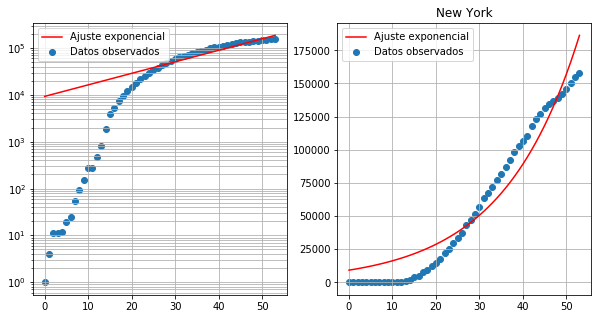

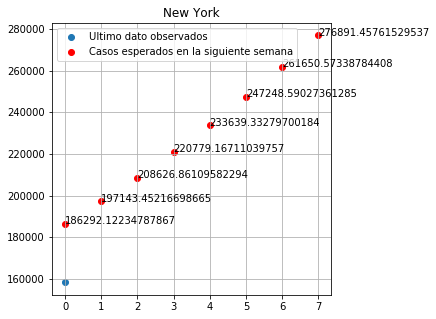

In [26]:
fitExpUS('New York',pl=1)

In [27]:
paises = cvaCUS['Admin2'].unique()
paises = paises[1:]
ajustes = []
Casos = []
LAT = []
for i in paises:
    ajuste, casos = fitExpUS(i)
    ajustes.append(ajuste)
    Casos.append(casos[-1])

In [28]:
ajustes=np.array(ajustes)

In [29]:
ajustes = pd.DataFrame(ajustes)
ajustes.columns = ['Corte', 'Crecimiento']

In [30]:
ajustes['Condados'] = paises
ajustes['Casos Ultimo dia'] = Casos
ajustes.sort_values('Crecimiento',ascending=False)

,Corte,Crecimiento,Condados,Casos Ultimo dia
915,0.000043,0.506498,Kandiyohi,35.0
1607,2.202769,0.455983,Ochiltree,5.0
719,0.010516,0.382371,Hickman,42.0
1555,1.547301,0.372575,Frio,3.0
624,0.002041,0.349039,Woodbury,409.0
...,...,...,...,...
1888,NaN,NaN,Out of WA,1.0
1889,NaN,NaN,Out of WV,1.0
1890,NaN,NaN,Out of WI,1.0
1891,NaN,NaN,Out of WY,1.0


In [31]:
PM25 = pd.DataFrame([])

AQNY = pd.read_csv('ad_viz_plotval_data.csv')
AQNY.Date = pd.to_datetime(AQNY.Date)
AQNY['Mes'] = AQNY.Date.dt.month
globals()['PM25'] = globals()['PM25'].append(AQNY.groupby(['Mes','COUNTY'])[['Daily Mean PM2.5 Concentration','DAILY_AQI_VALUE']].mean().reset_index())
globals()['NewYorkPM25']=AQNY.groupby(['Mes','COUNTY'])[['Daily Mean PM2.5 Concentration','DAILY_AQI_VALUE']].mean().reset_index()

STATE = ['New Jersey', 'Alaska', 'Alabama', 'Arizona', 'Arkansas','California',
         'Colorado', 'Connecticut', 'District of Columbia', 'Delaware','Florida',
        'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kasas' ,
        'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts','Michigan',
        'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Mexico', 'Noth Carolina', 'North Dakota', 'Ohio',
        'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington'
        'West Virginia','Wisconsin', 'Wyoming']

k=0

for i in range(len(STATE)):
#     print(str(AQNY.STATE[0])+'___')
#     k+=1
#     print(k)
    AQNY = pd.read_csv('ad_viz_plotval_data ('+str(i+1)+').csv')
#     print(AQNY.STATE[0])
    AQNY.Date = pd.to_datetime(AQNY.Date)
    AQNY['Mes'] = AQNY.Date.dt.month
    nombre = ''
    for i in str(AQNY.STATE[0]):
        if i != ' ':
            nombre = nombre + i
    globals()['PM25'] = globals()['PM25'].append(AQNY.groupby(['Mes','COUNTY'])[['Daily Mean PM2.5 Concentration','DAILY_AQI_VALUE']].mean().reset_index())
#     globals()[nombre+'PM25'] = AQNY.groupby(['Mes','COUNTY'])[['Daily Mean PM2.5 Concentration','DAILY_AQI_VALUE']].mean().reset_index()

In [32]:
PM25.head(2)

,Mes,COUNTY,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,1,Albany,8.954545,34.272727
1,1,Bronx,9.135789,36.726316


In [33]:
PM10 = pd.DataFrame([])

AQ = pd.read_csv('PM10.csv')
AQ.Date = pd.to_datetime(AQ.Date)
AQ['Mes'] = AQ.Date.dt.month

globals()['PM10'] = globals()['PM10'].append(AQ.groupby(['Mes','COUNTY'])[['Daily Mean PM10 Concentration','DAILY_AQI_VALUE']].mean().reset_index())

for i in range(16):
    AQ = pd.read_csv('PM10 ('+str(i+2)+').csv')
    AQ.Date = pd.to_datetime(AQ.Date)
    AQ['Mes'] = AQ.Date.dt.month

    globals()['PM10'] = globals()['PM10'].append(AQ.groupby(['Mes','COUNTY'])[['Daily Mean PM10 Concentration','DAILY_AQI_VALUE']].mean().reset_index())

PM10.reset_index()

,index,Mes,COUNTY,Daily Mean PM10 Concentration,DAILY_AQI_VALUE
0,0,1,Fresno,12.838710,11.806452
1,1,1,Kern,3.951613,3.822581
2,2,1,Kings,21.741935,20.193548
3,3,1,Riverside,28.311475,24.032787
4,4,1,Ventura,12.057692,11.211538
...,...,...,...,...,...
114,13,2,Henrico,5.428571,5.285714
115,14,2,Hopewell City,5.500000,5.250000
116,15,2,Norfolk City,7.400000,7.000000
117,16,2,Stafford,3.500000,3.500000


In [34]:
PM25.sort_values('DAILY_AQI_VALUE',ascending=False)
PM25 = PM25.groupby(['Mes','COUNTY'])['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE'].mean().reset_index()

C:\Users\mdomi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [35]:
k=0
PMyCOVID=[]
for i in range(len(PM10)):
    a = cvaCUS.iloc[:,5] == PM10.iloc[i,1]
    d = (PM25.iloc[:,1] == PM10.iloc[i,1])&(PM25.iloc[:,0] == PM10.iloc[i,0])
    ind = np.where(a==True)
    cnt = np.array(cvaCUS.iloc[ind[0],5])
    b = cvaDUS.iloc[:,5] == PM10.iloc[i,1]
    ind1 = np.where(b==True)
    dth = np.array(cvaDUS.iloc[ind[0],5])
    c = ajustes.iloc[:,2] == PM10.iloc[i,1]
    ind2 = np.where(c==True)
    crec = np.array(ajustes.iloc[ind2[0],1])
    ind3 = np.where(d == True)
#     print(ind3)
#     print(cnt[0], len(cnt))
    if len(cnt) != 0:
        lastdayCases = np.array(cvaCUS.iloc[ind[0],-1])
        lastdayDeaths = np.array(cvaDUS.iloc[ind1[0],-1])
        PM25i = np.array(PM25.iloc[ind3[0],2])
        AQI = PM10.iloc[i,3]
        PM = PM10.iloc[i,2]
        mes = str(PM10.iloc[i,0])
        if len(PM25i)>0:
            PMyCOVID.append([cnt[0],AQI, PM,PM25i[0], mes,lastdayCases[0], lastdayDeaths[0], float(crec[0])])
        else:
            PMyCOVID.append([cnt[0],AQI, PM,np.nan, mes,lastdayCases[0], lastdayDeaths[0], float(crec[0])])
    else:
        print(PM10.iloc[i,1])

Alexandria City
Hampton City
Hopewell City
Norfolk City
Winchester City
Alexandria City
Hampton City
Hopewell City
Norfolk City
Winchester City


In [36]:
PMCOV = pd.DataFrame(np.array(PMyCOVID))

In [37]:
PMCOV.columns = ['County','AQI', 'PM10','PM25','Mes', 'Casos confirmados','Muertes','Crecimiento']
PMCOV = PMCOV[PMCOV.Crecimiento != 'nan']
PMCOV = PMCOV[PMCOV.PM25 != 'nan']
PMCOV

,County,AQI,PM10,PM25,Mes,Casos confirmados,Muertes,Crecimiento
0,Fresno,11.806451612903226,12.838709677419354,12.144999999999994,1,458,7,0.07542125739224786
1,Kern,3.8225806451612905,3.9516129032258065,6.5769230769230775,1,809,4,0.06940348818168779
2,Kings,20.193548387096776,21.741935483870968,8.885714285714286,1,52,1,0.11788696467191011
3,Riverside,24.0327868852459,28.311475409836067,8.526296296296302,1,3563,118,0.07623764131689334
4,Ventura,11.211538461538462,12.057692307692308,4.015476190476189,1,496,16,0.0562628532146735
...,...,...,...,...,...,...,...,...
97,Davis,14.4,15.6,6.294545454545456,1,0,0,0.04956035222130012
98,Salt Lake,14.541176470588235,15.741176470588234,6.902727272727269,1,2144,24,0.06381747262341128
99,Utah,14.3,15.466666666666667,5.9305785123966945,1,777,7,0.0758866060299669
102,Fairfax,4.0,4.2,5.181818181818181,1,2889,95,0.08774119116615121


In [38]:
PMCOV['Muertes'] = pd.to_numeric(PMCOV['Muertes'])
PMCOV['Casos confirmados'] = pd.to_numeric(PMCOV['Casos confirmados'])
PMCOV['PM25'] = pd.to_numeric(PMCOV['PM25'])
PMCOV['PM10'] = pd.to_numeric(PMCOV['PM10'])
PMCOV['AQI'] = pd.to_numeric(PMCOV['AQI'])
PMCOV['Mes'] = pd.to_numeric(PMCOV['Mes'])
PMCOV['Crecimiento'] = pd.to_numeric(PMCOV['Crecimiento'])
PMCOV['Mortalidad'] = PMCOV['Muertes']/PMCOV['Casos confirmados']
PMCOV.dropna(inplace=True)
PMCOV.sort_values('Muertes', ascending = False)

,County,AQI,PM10,PM25,Mes,Casos confirmados,Muertes,Crecimiento,Mortalidad
47,Orleans,11.103448,12.000000,4.217241,2,6342,406,0.047535,0.064018
42,Orleans,10.645161,11.548387,4.496774,1,6342,406,0.047535,0.064018
11,Denver,27.777778,31.222222,7.226220,1,2583,132,0.066977,0.051103
45,East Baton Rouge,13.857143,14.928571,4.660714,2,1739,120,0.059563,0.069005
40,East Baton Rouge,12.827586,14.034483,5.296154,1,1739,120,0.059563,0.069005
...,...,...,...,...,...,...,...,...,...
83,Scioto,7.333333,7.882353,6.218182,1,6,0,0.044940,0.000000
65,Cumberland,7.535714,8.250000,7.803155,1,3,0,0.067835,0.000000
29,Polk,9.312500,10.312500,8.503721,1,7,0,0.073918,0.000000
80,Lawrence,9.400000,10.200000,5.068472,1,12,0,0.061708,0.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   County             57 non-null     object 
 1   AQI                57 non-null     float64
 2   PM10               57 non-null     float64
 3   PM25               57 non-null     float64
 4   Mes                57 non-null     int64  
 5   Casos confirmados  57 non-null     int64  
 6   Muertes            57 non-null     int64  
 7   Crecimiento        57 non-null     float64
 8   Mortalidad         57 non-null     float64
dtypes: float64(5), int64(3), object(1)
memory usage: 4.5+ KB
None


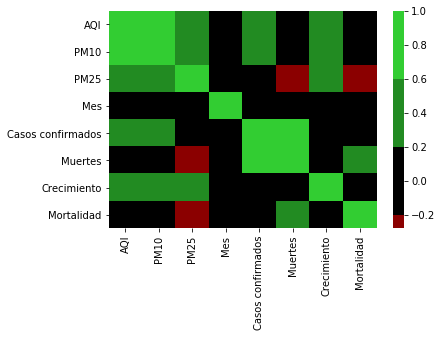

In [39]:
print(PMCOV[(PMCOV.Muertes>=2)&(PMCOV['Casos confirmados']>10)].info())
fig = plt.figure()
sns.heatmap(PMCOV[(PMCOV.Muertes>=2)&(PMCOV['Casos confirmados']>10)].corr(), cmap = ['red','darkred','black','forestgreen','limegreen'], center = 0)
fig.savefig('02042020.png',dpi=600)

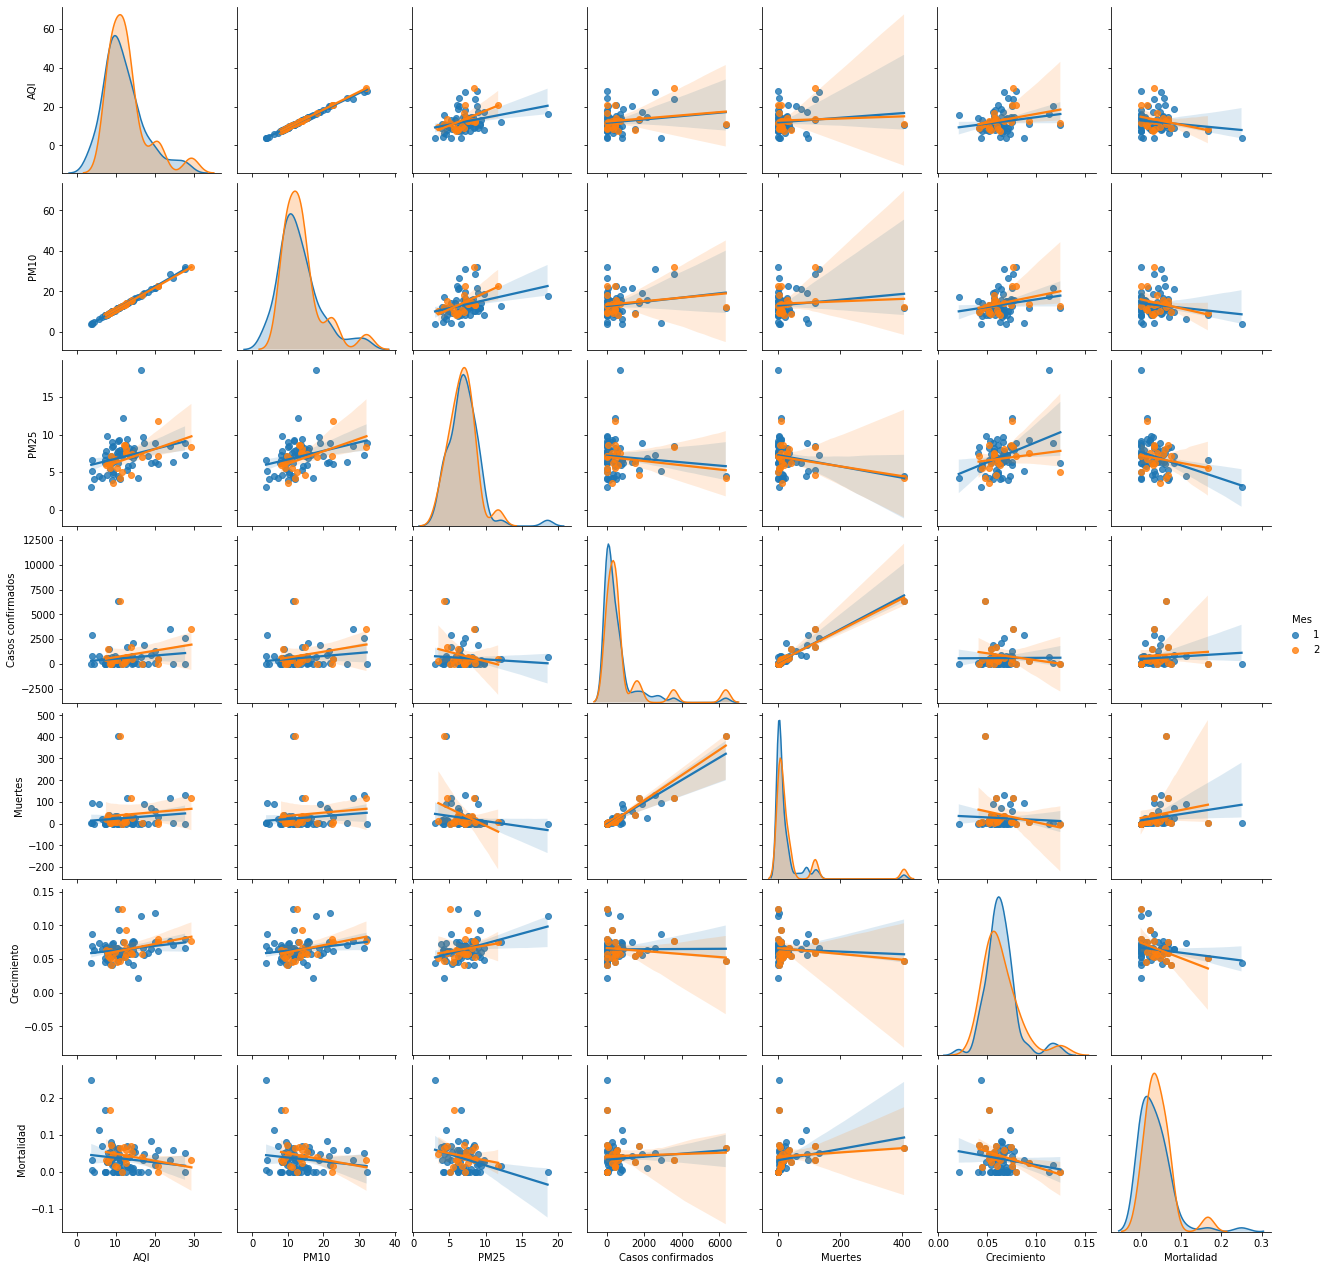

In [40]:
sns.pairplot(data = PMCOV, hue = 'Mes',kind='reg')

In [41]:
k=0
PMyCOVID=[]
for i in range(len(PM25)):
    a = cvaCUS.iloc[:,5] == PM25.iloc[i,1]
    ind = np.where(a==True)
    cnt = np.array(cvaCUS.iloc[ind[0],5])
    b = cvaDUS.iloc[:,5] == PM25.iloc[i,1]
    ind1 = np.where(b==True)
    dth = np.array(cvaDUS.iloc[ind[0],5])
    
    c = ajustes.iloc[:,2] == PM25.iloc[i,1]
    ind2 = np.where(c==True)
    crec = np.array(ajustes.iloc[ind2[0],1])
    
    if len(cnt) != 0:
        lastdayCases = np.array(cvaCUS.iloc[ind[0],-1])
        lastdayCases = sum(lastdayCases)
        lastdayDeaths = np.array(cvaDUS.iloc[ind1[0],-1])
        lastdayDeaths = sum(lastdayDeaths)
        AQI = PM25.iloc[i,3]
        PM = PM25.iloc[i,2]
        mes = str(PM25.iloc[i,0])
        PMyCOVID.append([cnt[0],AQI, PM, mes,lastdayCases, lastdayDeaths, float(crec[0])])
    else:
        print(PM25.iloc[i,1])
        
PMyCOVIDsinPM10 = PMyCOVID

Baltimore (City)
Bristol City
Hampton City
Lynchburg City
Norfolk City
Saint Clair
Saint Louis
Salem City
Virginia Beach City
Baltimore (City)
Hampton City
Saint Clair
Saint Louis
Baltimore (City)
Hampton City
Saint Clair
Saint Louis


In [42]:
PMCOVsinPM10 = pd.DataFrame(np.array(PMyCOVIDsinPM10))

In [43]:
PMCOVsinPM10.columns = ['County','AQI','PM25','Mes', 'Casos confirmados','Muertes','Crecimiento']
PMCOVsinPM10 = PMCOVsinPM10[PMCOVsinPM10.Crecimiento != 'nan']
PMCOVsinPM10 = PMCOVsinPM10[PMCOVsinPM10.PM25 != 'nan']
PMCOVsinPM10

,County,AQI,PM25,Mes,Casos confirmados,Muertes,Crecimiento
0,Ada,20.887096774193548,5.008064516129031,1,650,15,0.05160756872360039
1,Adair,19.0,4.561290322580645,1,151,12,0.08286802562150314
2,Adams,25.414080459770116,6.289050797182054,1,1804,70,0.07509335668424245
3,Alameda,30.00537634408602,7.321505376344086,1,1470,52,0.0610211482991769
4,Albany,34.27272727272727,8.954545454545453,1,954,32,0.05752196206322519
...,...,...,...,...,...,...,...
1391,Yakima,20.811965811965813,5.053846153846155,3,1015,44,0.06642644717396559
1392,Yellowstone,25.5,6.13,3,78,1,0.04667311309683564
1393,Yolo,17.517241379310345,4.20344827586207,3,161,13,0.06906355564903942
1394,York,39.6,9.716666666666667,3,1024,19,0.06011703266641895


In [44]:
PMCOVsinPM10['Muertes'] = pd.to_numeric(PMCOVsinPM10['Muertes'])
PMCOVsinPM10['Casos confirmados'] = pd.to_numeric(PMCOVsinPM10['Casos confirmados'])
PMCOVsinPM10['PM25'] = pd.to_numeric(PMCOVsinPM10['PM25'])
PMCOVsinPM10['AQI'] = pd.to_numeric(PMCOVsinPM10['AQI'])
PMCOVsinPM10['Mes'] = pd.to_numeric(PMCOVsinPM10['Mes'])
PMCOVsinPM10['Crecimiento'] = pd.to_numeric(PMCOVsinPM10['Crecimiento'])
PMCOVsinPM10['Mortalidad'] = PMCOVsinPM10['Muertes']/PMCOVsinPM10['Casos confirmados']
PMCOVsinPM10.dropna(inplace=True)
PMCOVsinPM10.sort_values('Casos confirmados', ascending = False)

,County,AQI,PM25,Mes,Casos confirmados,Muertes,Crecimiento,Mortalidad
314,New York,40.043956,9.896703,1,158258,17280,0.056616,0.109189
422,Suffolk,31.059140,7.519892,1,43749,1466,0.062519,0.033509
882,Suffolk,31.910714,7.669643,2,43749,1466,0.062519,0.033509
1334,Suffolk,23.466667,5.625000,3,43749,1466,0.062519,0.033509
307,Nassau,33.916667,8.221667,1,34575,1587,0.057098,0.045900
...,...,...,...,...,...,...,...,...
26,Becker,22.870968,5.706452,1,2,0,0.027357,0.000000
967,Becker,20.766667,4.966667,3,2,0,0.027357,0.000000
128,Dewey,24.483871,5.883871,1,2,0,0.016139,0.000000
1360,Valley,24.166667,5.813333,3,2,0,-0.003091,0.000000


                        AQI      PM25       Mes  Casos confirmados   Muertes  \
AQI                1.000000  0.994317 -0.065081           0.067903  0.060991   
PM25               0.994317  1.000000 -0.080101           0.063987  0.057901   
Mes               -0.065081 -0.080101  1.000000          -0.035603 -0.037729   
Casos confirmados  0.067903  0.063987 -0.035603           1.000000  0.922781   
Muertes            0.060991  0.057901 -0.037729           0.922781  1.000000   
Crecimiento        0.127311  0.128208 -0.014697           0.010792 -0.008584   
Mortalidad        -0.074519 -0.072798  0.000132           0.038551  0.093615   

                   Crecimiento  Mortalidad  
AQI                   0.127311   -0.074519  
PM25                  0.128208   -0.072798  
Mes                  -0.014697    0.000132  
Casos confirmados     0.010792    0.038551  
Muertes              -0.008584    0.093615  
Crecimiento           1.000000   -0.246098  
Mortalidad           -0.246098    1.000000  

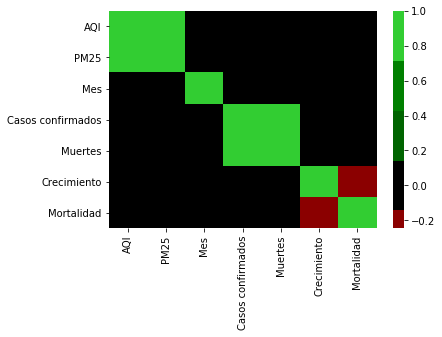

In [45]:
print(PMCOVsinPM10[(PMCOVsinPM10.Muertes>=2)&(PMCOVsinPM10['Casos confirmados']>5)].corr())
fig = plt.figure()
sns.heatmap(PMCOVsinPM10[(PMCOVsinPM10.Muertes>=2)&(PMCOVsinPM10['Casos confirmados']>5)].corr(),
            cmap = ['indianred','red','darkred','black','darkgreen','green','limegreen'], center = 0)
fig.savefig('02042020sinPM10.png',dpi=600)

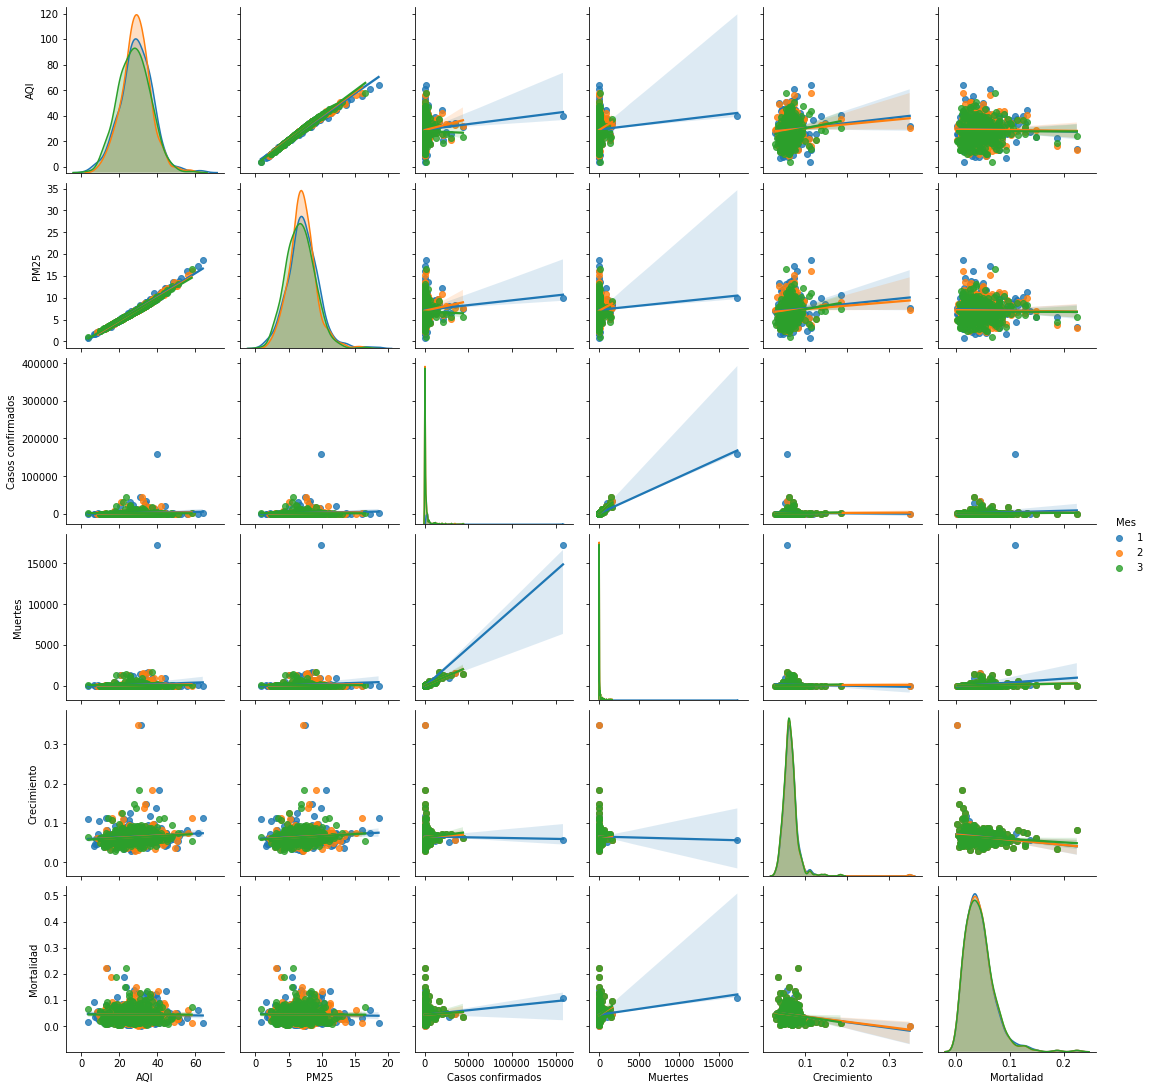

In [46]:
sns.pairplot(data = PMCOVsinPM10[(PMCOVsinPM10.Mortalidad>0)&(PMCOVsinPM10['Casos confirmados']>15)], hue = 'Mes',kind='reg')

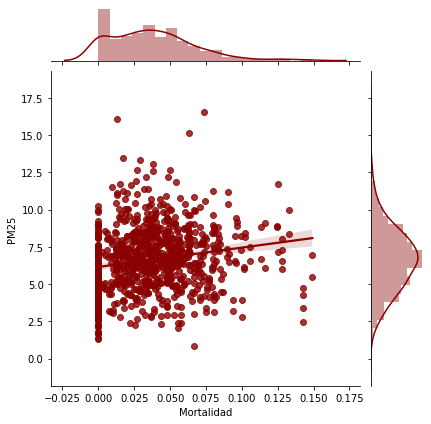

In [77]:
# Con condiciones de mortalidad mayor a cero y casos confirmados mayor a 15

sns.jointplot(PMCOVsinPM10[((PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)) & (PMCOVsinPM10.Mortalidad < 0.15)].Mortalidad,PMCOVsinPM10[((PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)) & (PMCOVsinPM10.Mortalidad < 0.15)].PM25, kind='reg',color='darkred')


                        AQI      PM25       Mes  Casos confirmados   Muertes  \
AQI                1.000000  0.996657 -0.082089           0.087184  0.095059   
PM25               0.996657  1.000000 -0.080915           0.082938  0.091863   
Mes               -0.082089 -0.080915  1.000000          -0.008361 -0.007635   
Casos confirmados  0.087184  0.082938 -0.008361           1.000000  0.937101   
Muertes            0.095059  0.091863 -0.007635           0.937101  1.000000   
Crecimiento        0.188201  0.182672 -0.014851           0.087203  0.066646   
Mortalidad         0.076060  0.075006  0.000237           0.067905  0.153220   

                   Crecimiento  Mortalidad  
AQI                   0.188201    0.076060  
PM25                  0.182672    0.075006  
Mes                  -0.014851    0.000237  
Casos confirmados     0.087203    0.067905  
Muertes               0.066646    0.153220  
Crecimiento           1.000000   -0.024873  
Mortalidad           -0.024873    1.000000  

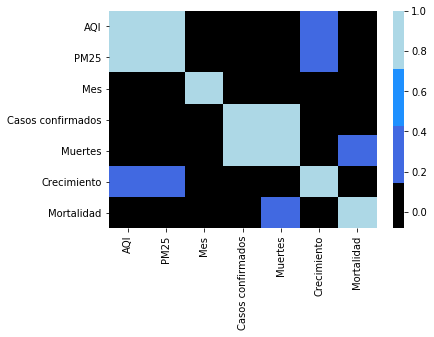

In [85]:
print(PMCOVsinPM10[((PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)) ].corr())
sns.heatmap(PMCOVsinPM10[((PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)) ].corr(),center=0,cmap=['coral','red','darkred','black','royalblue','DodgerBlue','lightblue'])

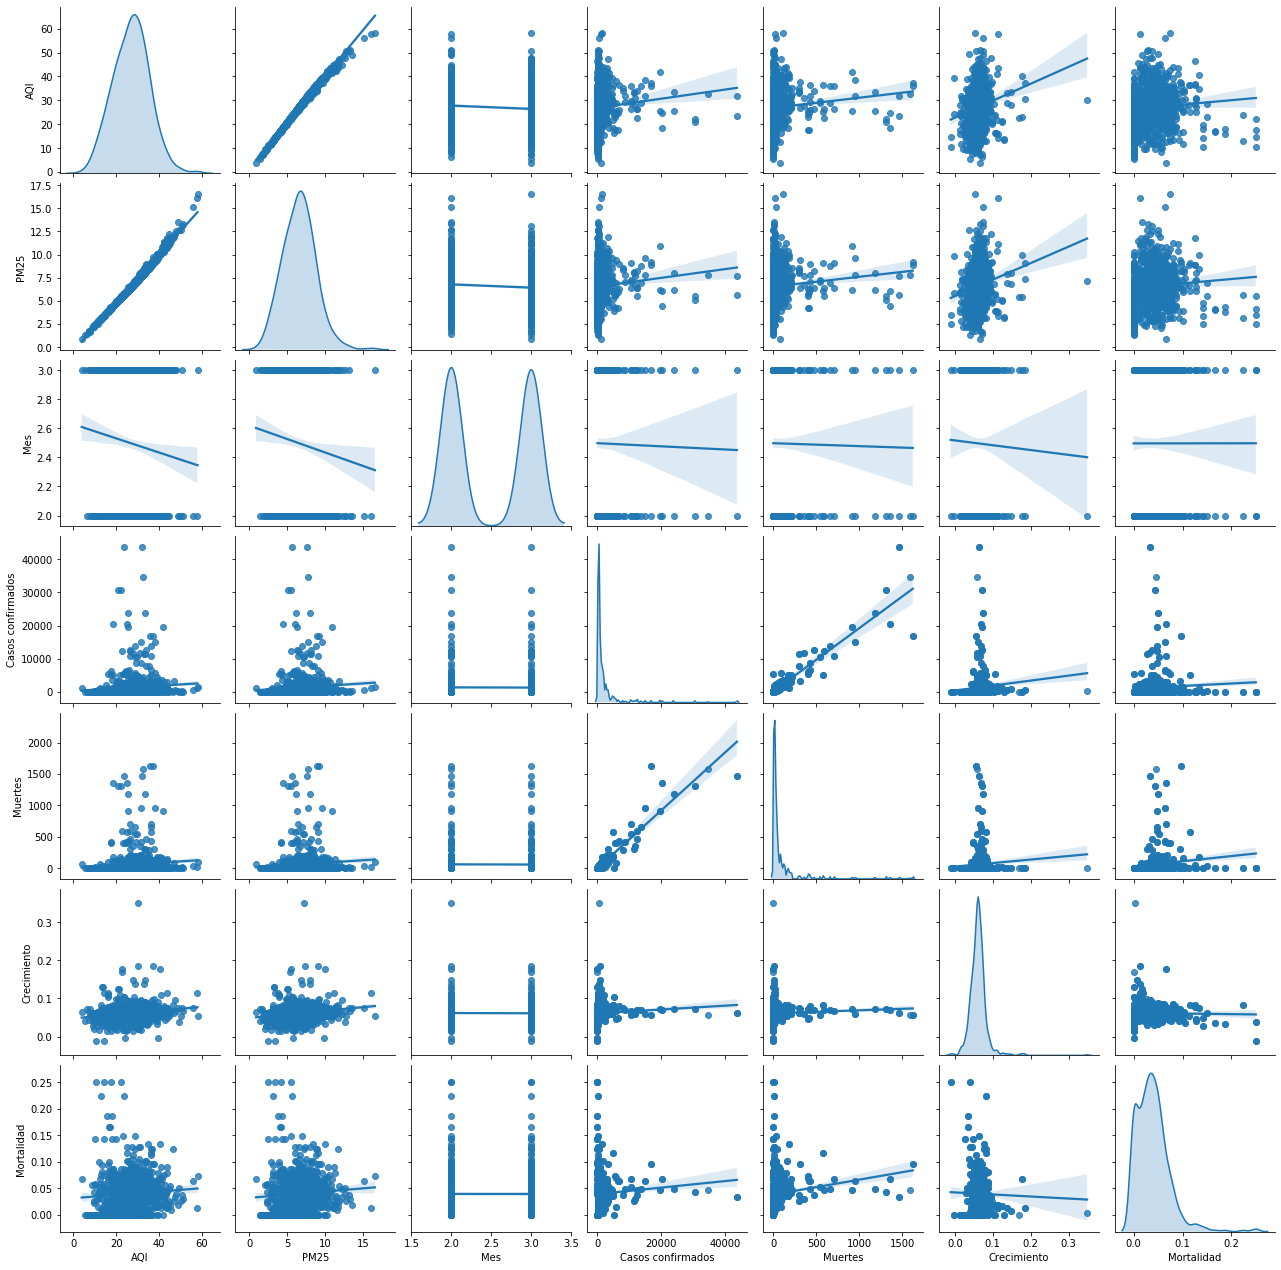

In [86]:
sns.pairplot(PMCOVsinPM10[((PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)) ], kind='reg',diag_kind='kde',palette='red')

In [72]:
# Obtencion R Pearson y P-Value
import scipy.stats
scipy.stats.pearsonr(PMCOVsinPM10[(PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)].PM25, PMCOVsinPM10[(PMCOVsinPM10.Mes == 3) | (PMCOVsinPM10.Mes == 2)].Mortalidad) 

(0.0750064339442934, 0.027122067062118657)

In [81]:
PMCOVsinPM10[PMCOVsinPM10.Mortalidad>0.12].reset_index()

,index,County,AQI,PM25,Mes,Casos confirmados,Muertes,Crecimiento,Mortalidad
0,18,Athens,26.500000,6.362500,1,3,1,0.007351,0.333333
1,20,Baker,34.225806,8.345161,1,39,5,0.046410,0.128205
2,25,Beaver,39.500000,10.090909,1,369,46,0.077390,0.124661
3,75,Cascade,22.451613,5.500000,1,14,2,0.027584,0.142857
4,191,Hennepin,44.311475,11.304918,1,1332,177,0.075887,0.132883
5,208,Iron,13.516129,3.245161,1,4,1,-0.011249,0.250000
6,221,Kay,29.451613,7.087097,1,47,6,0.041130,0.127660
7,230,Kleberg,22.000000,5.313793,1,8,1,0.082391,0.125000
8,231,Klickitat,22.516129,5.477419,1,16,3,0.034320,0.187500
9,234,La Paz,11.966667,2.866667,1,7,1,0.048727,0.142857
